<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%204-CIFAR%2010%20Image%20Classification/CIFAR_10_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,GRU,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
train_labels,test_labels=to_categorical(train_labels),to_categorical(test_labels)

170498071/170498071 [==============================] - 54s 0us/step


In [ ]:
model=Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               786688    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 828490 (3.16 MB)
Trainable params: 828490 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_images,train_labels,epochs=1,validation_data=(test_images,test_labels))



1563/1563 [==============================] - 26s 15ms/step - loss: 1.8712 - accuracy: 0.3210 - val_loss: 1.7423 - val_accuracy: 0.3699


In [ ]:
loss,accuracy=model.evaluate(test_images,test_labels)
print(f'accuracy:{accuracy}')
print(f'loss:{loss}')


313/313 [==============================] - 2s 6ms/step - loss: 1.7423 - accuracy: 0.3699
accuracy:0.3698999881744385
loss:1.7423150539398193


In [ ]:
number=5
actual_labels=np.argmax(test_labels[:number],axis=1)
predicted=model.predict(test_images[:number])
predicted_labels=np.argmax(predicted,axis=1)
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


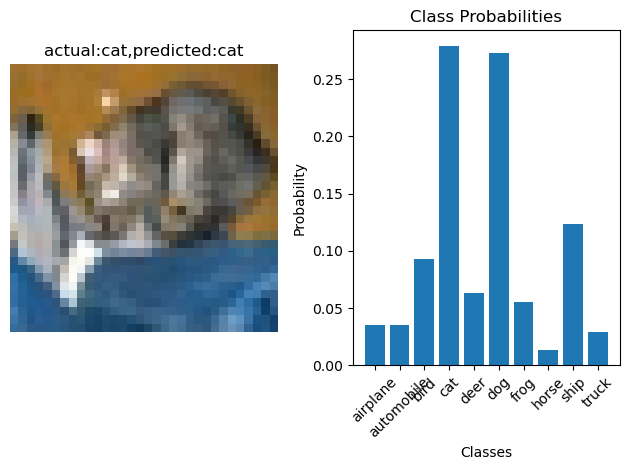

1/1 [==============================] - 0s 43ms/step


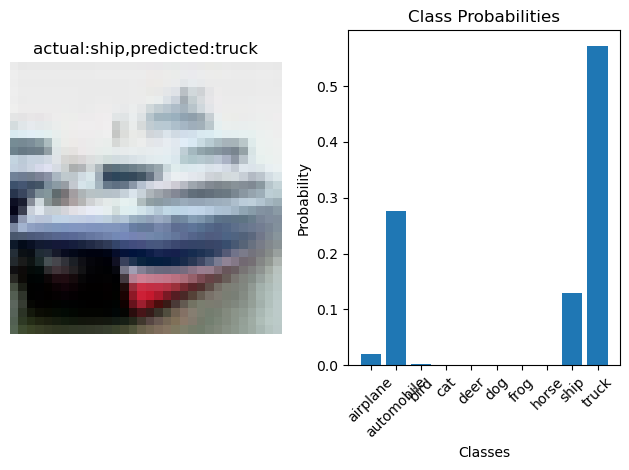

1/1 [==============================] - 0s 42ms/step


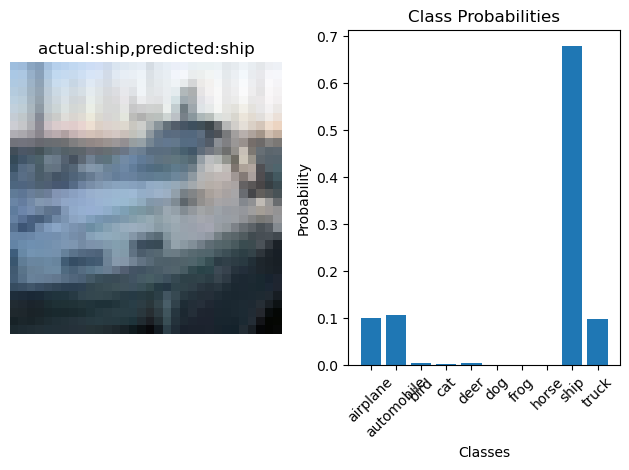

1/1 [==============================] - 0s 41ms/step


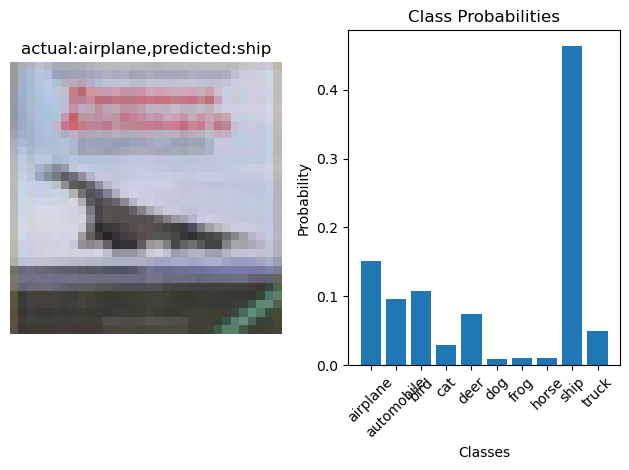

1/1 [==============================] - 0s 47ms/step


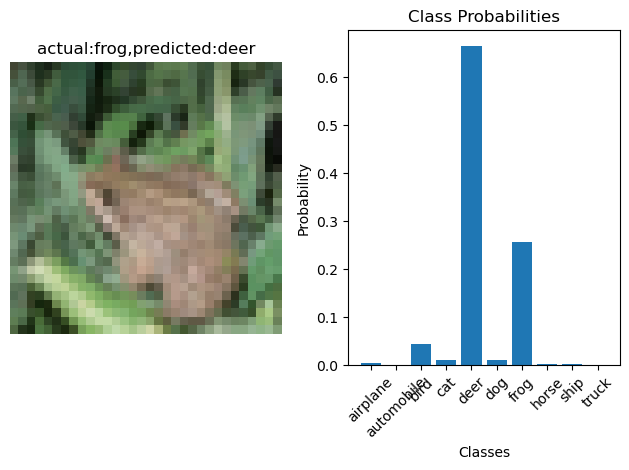

In [ ]:
for i in range(number):
    plt.subplot(1,2,1)
    plt.title(f'actual:{classes[actual_labels[i]]},predicted:{classes[predicted_labels[i]]}')
    plt.imshow(test_images[i])
    plt.axis("off")
    test_image = np.expand_dims(test_images[i], axis=0)
    probabilities = model.predict(test_image)[0]

    plt.subplot(1, 2, 2)
    plt.bar(classes, probabilities)
    plt.title('Class Probabilities')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()


    plt.show()


In [ ]:
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5661 - accuracy: 0.4383 - val_loss: 1.5506 - val_accuracy: 0.4491
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5290 - accuracy: 0.4555 - val_loss: 1.5364 - val_accuracy: 0.4480
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4974 - accuracy: 0.4629 - val_loss: 1.5144 - val_accuracy: 0.4625
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4709 - accuracy: 0.4741 - val_loss: 1.5311 - val_accuracy: 0.4558
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4487 - accuracy: 0.4831 - val_loss: 1.5010 - val_accuracy: 0.4650


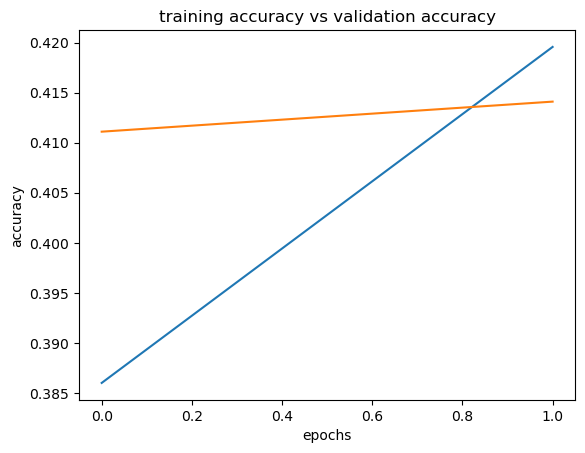

In [ ]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='training accuracy')
plt.title(f'training accuracy vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


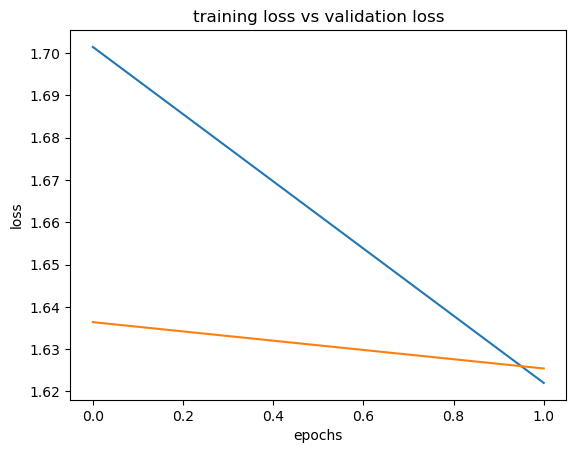

In [ ]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='training loss')
plt.title(f'training loss vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
